In [1]:
import seml
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lataq.metrics.metrics import metrics
from lataq_reproduce.exp_dict import EXPERIMENT_INFO

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Get results for SCANVI, SCVI, MARS, SVM

In [2]:
results = {}

In [3]:
results['scanvi'] = seml.get_results('scanvi', to_data_frame=True)
for score in list(results['scanvi']['result.integration_scores'].loc[0].columns):
    results['scanvi'][f'result.{score}'] = results['scanvi']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['scanvi']['result.f1-score-macro'] = results['scanvi']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['scanvi']['result.f1-score-weighted'] = results['scanvi']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['scanvi'] = results['scanvi'][[
    'config.data',
    'result.reference_time',
    'result.query_time',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['scanvi'] = results['scanvi'].assign(method='scanvi')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [4]:
results['scvi'] = seml.get_results('scvi', to_data_frame=True)
for score in list(results['scvi']['result.integration_scores'].loc[0].columns):
    results['scvi'][f'result.{score}'] = results['scvi']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['scvi'] = results['scvi'][[
    'config.data',
    'result.reference_time',
    'result.query_time',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
]]
results['scvi'] = results['scvi'].assign(method='scvi')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [5]:
results['svm'] = seml.get_results('svm', to_data_frame=True)
results['svm']['result.f1-score-macro'] = results['svm']['result'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['svm']['result.f1-score-weighted'] = results['svm']['result'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['svm'] = results['svm'][[
    'config.data',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['svm'] = results['svm'].assign(method='svm')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [6]:
results['mars'] = seml.get_results('mars', to_data_frame=True).set_index('config.data')
results['mars']['result.integration_scores'] = seml.get_results(
    'mars_metrics', 
    to_data_frame=True).set_index('config.data')['result.integration_scores']
for score in list(results['mars']['result.integration_scores'].iloc[0].columns):
    results['mars'][f'result.{score}'] = results['mars']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['mars']['result.f1-score-macro'] = results['mars']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['mars']['result.f1-score-weighted'] = results['mars']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['mars'] = results['mars'].reset_index()
results['mars'] = results['mars'][[
    'config.data',
    'result.reference_time',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['mars'] = results['mars'].assign(method='mars')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

# Get best results from hyperopt

In [7]:
results['embedcvae'] = seml.get_results('hyperparam_embedcvae', to_data_frame=True)
results['tranvae'] = seml.get_results('hyperparam_tranvae', to_data_frame=True)

  0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

In [12]:
get = 'classification'

for score in list(results['tranvae']['result.integration_scores'].iloc[0].columns):
    results['tranvae'][f'result.{score}'] = results['tranvae']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['tranvae']['result.f1-score-macro'] = results['tranvae']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['tranvae']['result.f1-score-weighted'] = results['tranvae']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)

if get == 'integration':
    results['tranvae']['integration_scores_mean'] = results['tranvae'][[
        'result.NMI_cluster/label',
        'result.ARI_cluster/label',
        'result.ASW_label',
        'result.ASW_label/batch',
        'result.PCR_batch',
        'result.isolated_label_F1',
        'result.isolated_label_silhouette',
        'result.graph_conn',
    ]].mean(axis=1)
    results['tranvae'] = (
        results['tranvae']
        .sort_values(by='integration_scores_mean')
        .groupby('config.data')
        .last()
        .reset_index()
    )
elif get == 'classification':
    results['tranvae'] = (
        results['tranvae']
        .sort_values(by='result.f1-score-macro')
        .groupby('config.data')
        .last()
        .reset_index()
    )
results['tranvae'] = results['tranvae'][[
    'config.data',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['tranvae'] = results['tranvae'].assign(method='tranvae')


In [13]:
get = 'classification'

for score in list(results['embedcvae']['result.integration_scores'].iloc[0].columns):
    results['embedcvae'][f'result.{score}'] = results['embedcvae']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['embedcvae']['result.f1-score-macro'] = results['embedcvae']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['embedcvae']['result.f1-score-weighted'] = results['embedcvae']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)

if get == 'integration':
    results['embedcvae']['integration_scores_mean'] = results['embedcvae'][[
        'result.NMI_cluster/label',
        'result.ARI_cluster/label',
        'result.ASW_label',
        'result.ASW_label/batch',
        'result.PCR_batch',
        'result.isolated_label_F1',
        'result.isolated_label_silhouette',
        'result.graph_conn',
    ]].mean(axis=1)
    results['embedcvae'] = (
        results['embedcvae']
        .sort_values(by='integration_scores_mean')
        .groupby('config.data')
        .last()
        .reset_index()
    )
elif get == 'classification':
    results['embedcvae'] = (
        results['embedcvae']
        .sort_values(by='result.f1-score-macro')
        .groupby('config.data')
        .last()
        .reset_index()
    )
results['embedcvae'] = results['embedcvae'][[
    'config.data',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['embedcvae'] = results['embedcvae'].assign(method='embedcvae')


# Get results for symphony and seurat

In [14]:
r_scores = pd.read_pickle('seurat/result_seurat_symphony.pickle')


In [15]:
r_scores['method'][~r_scores['classification_report'].isna()] = 'seurat'

In [16]:
results['seurat'] = r_scores[r_scores['method'] == 'seurat']
results['symphony'] = r_scores[r_scores['method'] == 'symphony']

In [17]:
for score in list(results['seurat']['integration_scores'].iloc[0].columns):
    results['seurat'][f'{score}'] = results['seurat']['integration_scores'].apply(
        lambda x: x[score]
    )
results['seurat']['f1-score-macro'] = results['seurat']['classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['seurat']['f1-score-weighted'] = results['seurat']['classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['seurat'].columns = [
    f'result.{x}' 
    if i > 1 
    else f'config.{x}'
    for i, x 
    in enumerate(
        results['seurat'].columns
    )
]
results['seurat'] = results['seurat'][[
    'config.data',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['seurat'] = results['seurat'].assign(method='seurat')

<ipython-input-17-5403c03ac93d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['seurat'][f'{score}'] = results['seurat']['integration_scores'].apply(
<ipython-input-17-5403c03ac93d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['seurat']['f1-score-macro'] = results['seurat']['classification_report_query'].apply(
<ipython-input-17-5403c03ac93d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [18]:
for score in list(results['symphony']['integration_scores'].iloc[0].columns):
    results['symphony'][f'{score}'] = results['symphony']['integration_scores'].apply(
        lambda x: x[score]
    )
results['symphony'].columns = [
    f'result.{x}' 
    if i > 1 
    else f'config.{x}'
    for i, x 
    in enumerate(
        results['symphony'].columns
    )
]
results['symphony'] = results['symphony'][[
    'config.data',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    #'result.f1-score-macro',
    #'result.f1-score-weighted'
]]
results['symphony'] = results['symphony'].assign(method='symphony')

<ipython-input-18-e4811c48a5a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['symphony'][f'{score}'] = results['symphony']['integration_scores'].apply(


In [19]:
results_df = pd.concat(results.values())

# Visualization

In [20]:
integration_methods = ['scanvi', 'scvi', 'seurat', 'symphony', 'tranvae', 'embedcvae']
classification_methods = ['scanvi', 'seurat', 'svm', 'mars', 'tranvae', 'embedcvae']

In [21]:
results_df['integration_scores_mean'] = results_df[[
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
]].mean(axis=1)

In [22]:
results_melt = pd.melt(results_df, id_vars = ['config.data', 'method'])
results_melt = results_melt[~results_melt['variable'].str.contains('time')]
results_melt

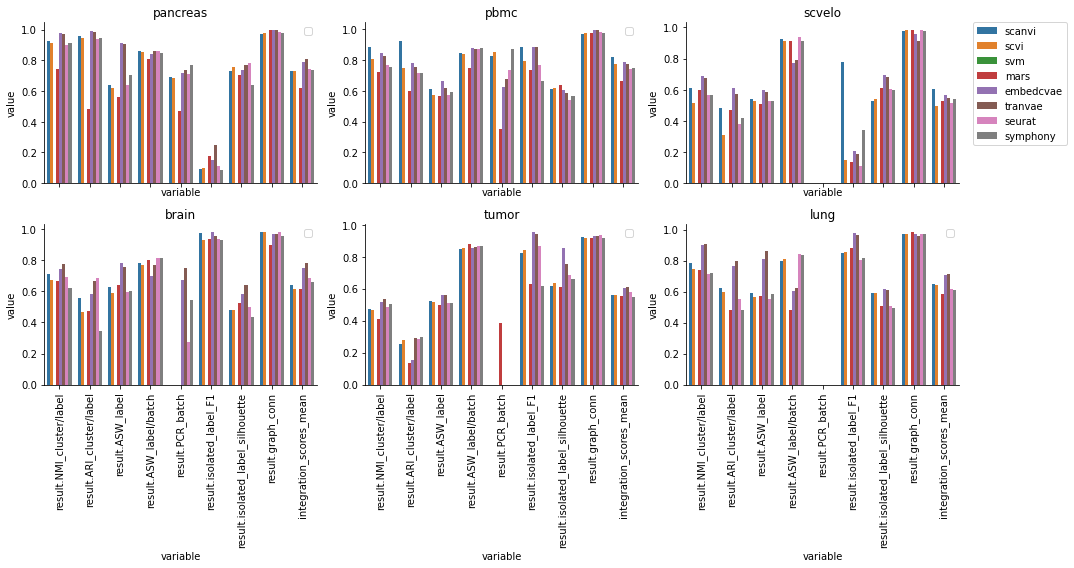

In [25]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8), sharex=True)
ax = ax.flatten()
for i, data in enumerate(
    ['pancreas', 'pbmc', 'scvelo', 'brain', 'tumor', 'lung']
):
    sns.barplot(
        x='variable', 
        y='value',
        hue='method',
        data=results_melt[
            (results_melt['config.data']==data)
            & (~results_melt['variable'].str.contains('f1|accuracy', regex=True))
        ],
        ax=ax[i]
    )
    if i == 2:
        ax[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else:
        ax[i].legend('')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    ax[i].set_title(data)
    sns.despine()
fig.tight_layout()

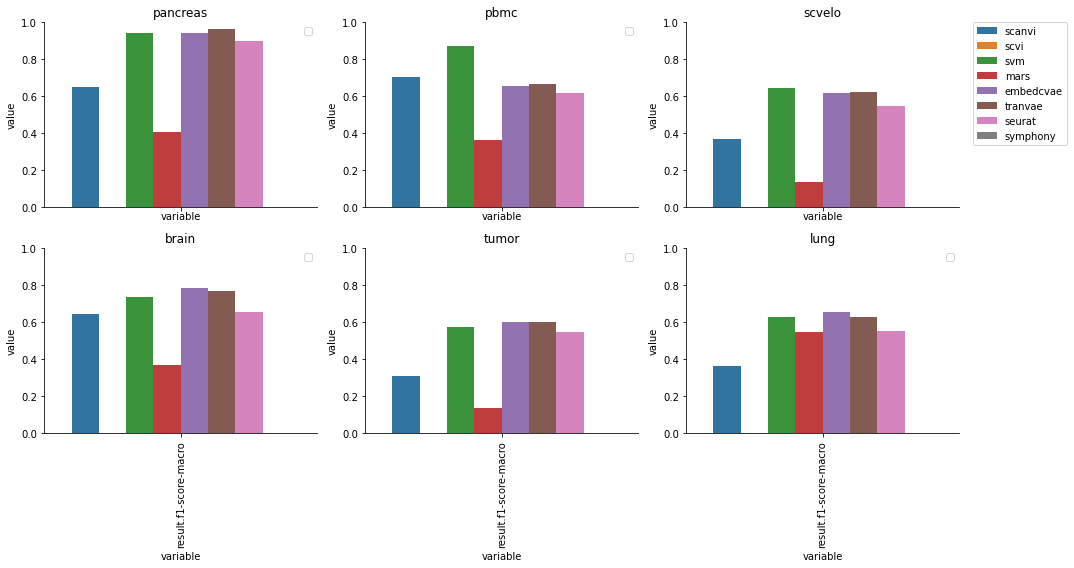

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8), sharex=True)
ax = ax.flatten()
for i, data in enumerate(
    ['pancreas', 'pbmc', 'scvelo', 'brain', 'tumor', 'lung']
):
    sns.barplot(
        x='variable', 
        y='value',
        hue='method',
        data=results_melt[
            (results_melt['config.data']==data)
            & (results_melt['variable'].str.contains('macro', regex=True))
        ],
        ax=ax[i]
    )
    if i == 2:
        ax[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else:
        ax[i].legend('')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    ax[i].set_title(data)
    ax[i].set_ylim([0, 1])
    sns.despine()
fig.tight_layout()

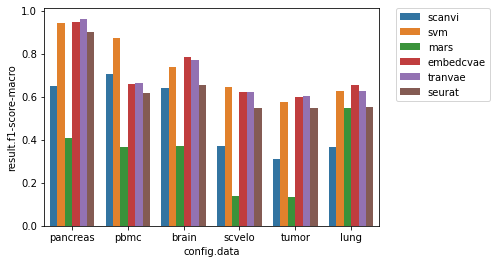

In [27]:
sns.barplot(
    x='config.data',
    y='result.f1-score-macro',
    hue='method',
    data=results_df[results_df['method'].isin(classification_methods)]
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

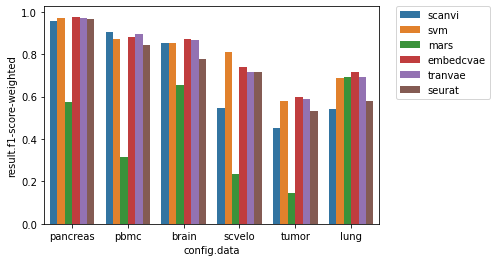

In [29]:
sns.barplot(
    x='config.data',
    y='result.f1-score-weighted',
    hue='method',
    data=results_df[results_df['method'].isin(classification_methods)]
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)